# The Harry Potter Fandom on AO3: A short analyzis of the 500 most popular fanfictions

##### Archive of Our Own is, as the name says, an archive that hosts fan works of the most variable fandom on the internet. It is, currently, the most popular site to host fanfictions. In this project, I collect and analyze the data of the most popular fanfics in the Harry Potter fandom. To make the cut for the most popular fanfics I considered only finished works and organized them by Kudos (likes), then taking the first 500 works.


##### The objective is to use Python language to scrape and analyze the necessary data and create graphics for visualization of the information extracted.

In [1]:
# Importing the packages
from bs4 import BeautifulSoup
from urllib.request import urlopen, Request
import requests 
import pandas as pd
import re
import lxml
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline 

In [10]:
def getEverything(first, last):
    # creating an empty dictionary to store the information i scrape
    dic = {'Title': [], 'Date': [], 'Ship': [], 'Ship_category': [], 'Summary': [], 'Language': [], 'Word_Count': [], 'Comments': [], 'Chapters':[], 'Kudos':[], 'Bookmarks':[], 'Hits':[]}

    
    while first != last:
        # first while loop to scrape all the pages i want
        url = f'https://archiveofourown.org/tags/Harry%20Potter%20-%20J*d*%20K*d*%20Rowling/works?commit=Sort+and+Filter&page={first}&work_search%5Bcomplete%5D=T&work_search%5Bcrossover%5D=&work_search%5Bdate_from%5D=&work_search%5Bdate_to%5D=&work_search%5Bexcluded_tag_names%5D=&work_search%5Blanguage_id%5D=&work_search%5Bother_tag_names%5D=&work_search%5Bquery%5D=&work_search%5Bsort_column%5D=kudos_count&work_search%5Bwords_from%5D=&work_search%5Bwords_to%5D='
        response = requests.get(url)
        html_page = BeautifulSoup(response.content, 'html.parser')

        # scraping the page for all the articles, where the individual fics information are stored
        article = html_page.find_all(role='article')

        # second while loop to go through each one separetely
        num = 0
        while num != 20:
            title = article[num].find(class_='heading').get_text(strip=True).split('by')[0] # separating the fic name from the author name and storing only the fic name
            date = article[num].find(class_='datetime').get_text(strip=True)[-4:]
            try: # checking if there is a relashionship tag, if not, passing
                ship = article[num].find(class_='relationships').get_text(strip=True)
            except AttributeError:
                pass
            ship_category = article[num].find(class_='category').get_text(strip=True).split(',')[0]
            summary = article[num].find(class_='userstuff summary').get_text(strip=True)
            language = article[num].find('dd',class_='language').get_text(strip=True)
            words_count = article[num].find('dd', class_='words').get_text(strip=True)
            comments = article[num].find('dd', class_='comments').get_text(strip=True)
            chapters = article[num].find('dd', class_='chapters').get_text(strip=True)
            kudos = article[num].find('dd', class_='kudos').get_text(strip=True)
            bookmarks = article[num].find('dd', class_='bookmarks').get_text(strip=True)
            hits = article[num].find('dd', class_='hits').get_text(strip=True)
            num += 1
        
            # appending the results in a dictionary
            dic['Title'].append(title)
            dic['Date'].append(date)
            try: # printing N/A if there's no relationship tag
                dic['Ship'].append(ship)
            except:
                dic['Ship'].append('N/A')
            pass
            dic['Ship_category'].append(ship_category)
            dic['Summary'].append(summary)
            dic['Language'].append(language)
            dic['Word_Count'].append(words_count)
            dic['Comments'].append(comments)
            dic['Chapters'].append(chapters)
            dic['Kudos'].append(kudos)
            dic['Bookmarks'].append(bookmarks)
            dic['Hits'].append(hits)
        
        first = first + 1
    return dic

In [13]:
fic = getEverything(1,26)

In [14]:
fics = pd.DataFrame(fic)
fics

,Title,Date,Ship,Ship_category,Summary,Language,Word_Count,Comments,Chapters,Kudos,Bookmarks,Hits
0,All the Young Dudes,2018,Sirius Black/Remus Lupin,M/M,LONG fic charting the marauders' time at Hogwa...,English,"526,969",27876,188/188,130692,26553,8892398
1,Then Comes a Mist and a Weeping Rain,2011,Draco Malfoy/Harry Potter,M/M,It always rains for Draco Malfoy. Metaphorical...,English,"21,139",936,1/1,54516,10562,650648
2,Manacled,2019,Hermione Granger/Draco Malfoy,F/M,Harry Potter is dead. In the aftermath of the ...,English,"370,515",11272,77/77,47177,13595,3001995
3,The Standard You Walk Past,2015,Draco Malfoy/Harry Potter,M/M,On returning to Hogwarts for their Eighth Year...,English,"46,202",3102,14/14,43344,8397,681187
4,Tea and No Sympathy,2014,Draco Malfoy/Harry Potter,M/M,"It's Potter's fault, of course, that Draco fin...",English,"70,045",1818,11/11,40812,10467,635626
...,...,...,...,...,...,...,...,...,...,...,...,...
495,Ten Thousand Reasons Why Not,2018,Draco Malfoy/Harry Potter,M/M,Harry and Draco are stand-ins for the usual wi...,English,"8,449",356,1/1,6969,1151,59146
496,Of Cinema and Sticky Notes,2012,Sirius Black/Remus Lupin,M/M,Remus Lupin is the office bore. Sirius Black i...,English,"12,452",145,3/3,6965,1056,93761
497,"Shake it, Bake it, Brew it",2019,Draco Malfoy/Harry Potter,M/M,Between trauma after being attacked by Quirrel...,English,"139,774",822,32/32,6962,2127,190579
498,Growing Old With You,2018,Harry Potter/Tom Riddle,F/M,A chance meeting between a Hogwarts student an...,English,"28,071",153,3/3,6961,1636,83766


In [6]:
years = fics['Date'].value_counts().to_frame().reset_index()
years.rename(columns={'index':'Year', 'Date':'Fics_Published'}, inplace=True)
years

,Year,Fics_Published
0,2017,74
1,2016,63
2,2018,58
3,2015,51
4,2020,47
5,2014,44
6,2019,36
7,2021,30
8,2012,27
9,2013,26


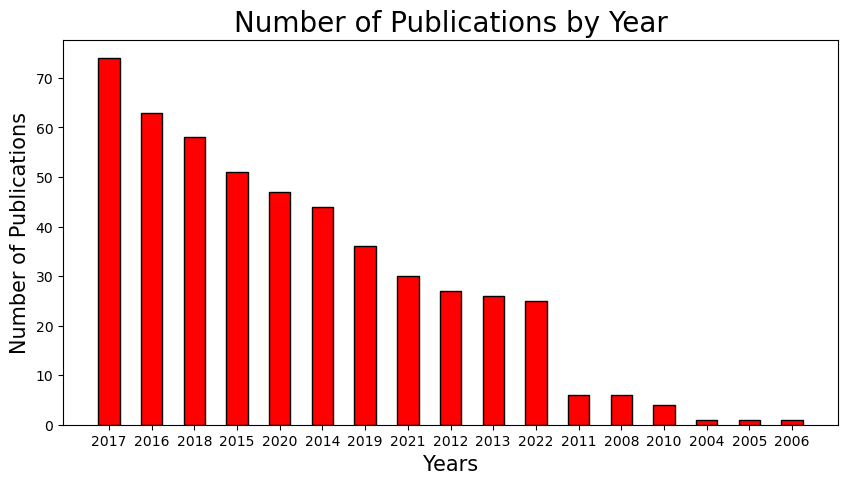

In [7]:
plt.figure(figsize=(10,5))
plt.title('Number of Publications by Year', fontsize=20)
plt.ylabel('Number of Publications', fontsize=15)
plt.xlabel('Years', fontsize=15)
plt.bar(years['Year'], years['Fics_Published'], width = 0.5, color = 'red', edgecolor = "black")
plt.show()

Most of the most popular fics were written in 2017, a very good year for the Potterhead fanfic community. By then, the books had been finnished for 10 years and the movies for 6 years.
Still we have some as old as 2004, when we only had 5 books published, making you wonder how different, cannon-wise, those fics are from the ones written *after* they had all the information.

The top 5 is closed by year 2020, the year the pandemic hit, and with people at home, hobbies like writting and reading fanfics, seems to have had a greater space in people's lives, as those works, along with the ones from 2021 and 2022, had less time to archive all the kudos they did.

It's not surprising that older fics are the most liked (recieved more kudos), since some of them get so popular they become almost cannon for the fandom, and had more time to become famous.

In [15]:
ship_category = fics['Ship_category'].value_counts().to_frame().reset_index()
ship_category.rename(columns={'index':'Ship_category', 'Ship_category':'Apperances'}, inplace=True)
sc = ship_category[:5]
sc

,Ship_category,Apperances
0,M/M,321
1,Gen,75
2,F/M,74
3,F/F,18
4,Multi,6


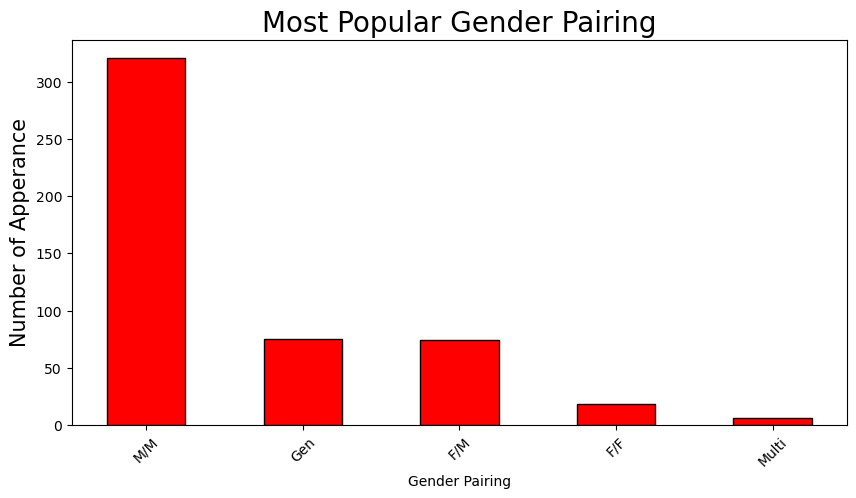

In [16]:
plt.figure(figsize=(10,5))
plt.title('Most Popular Gender Pairing', fontsize=20)
plt.ylabel('Number of Apperance', fontsize=15)
plt.xlabel('Gender Pairing', fontsize=10)
plt.xticks(size = 10, rotation = 45)
plt.bar(sc['Ship_category'], sc['Apperances'], width = 0.5, color = 'red', edgecolor = "black")
plt.show()

Here we have the most popular gender pairings.
Even though there's only one cannonicaly gay character in the Harry Potter saga (and this information was only added after the series were over), male/male is the most common pairing in fics. 
Why is that? Well, according to Sirpa Leppänen's paper "Cybergirls in Trouble? Fan Fiction as a Discursive Space for Interrogating Gender and Sexuality", this is only a way to explore and play with gender in a safe space, so writters create the space they need in order to explore it. When thinking that writting fiction is a commom hobby among teenagers, this make even more sense, since this is most likely, the *first* space they use for romantic and sexual exploration.   

In [9]:
ships = fics['Ship'].value_counts().to_frame().reset_index()
ships.rename(columns={'index':'Ship', 'Ship':'Apperances'}, inplace=True)
ship = ships.head()
ship

,Ship,Apperances
0,Draco Malfoy/Harry Potter,232
1,Hermione Granger/Draco Malfoy,43
2,Sirius Black/Remus Lupin,29
3,Harry Potter/Tom Riddle,22
4,Original Percival Graves/Newt Scamander,16


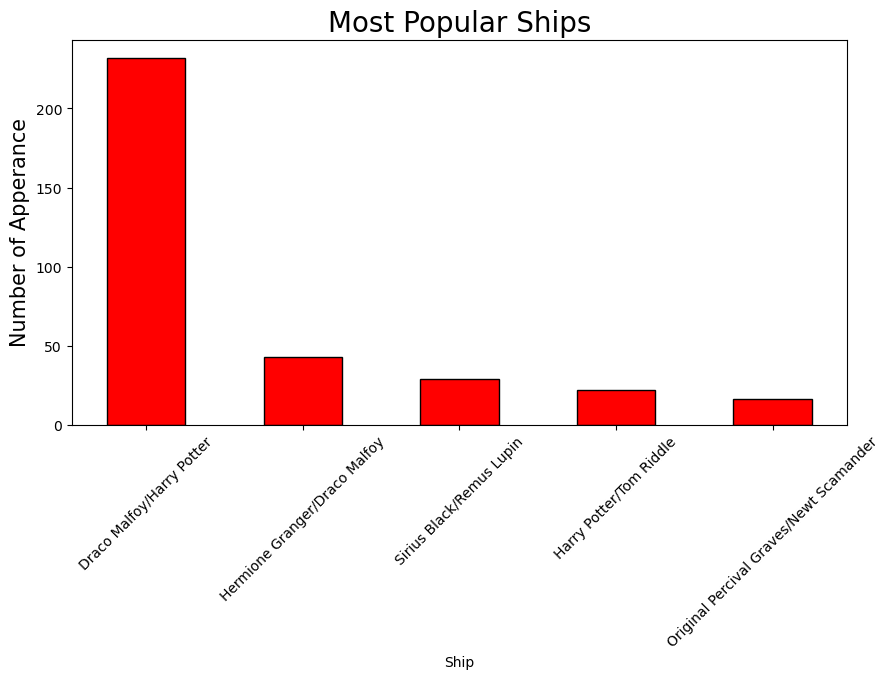

In [12]:
plt.figure(figsize=(10,5))
plt.title('Most Popular Ships', fontsize=20)
plt.ylabel('Number of Apperance', fontsize=15)
plt.xlabel('Ship', fontsize=10)
plt.xticks(size = 10, rotation = 45)
plt.bar(ship['Ship'], ship['Apperances'], width = 0.5, color = 'red', edgecolor = "black")
plt.show()

When checking the top 5 most popular pairings in fanfictions, not a single one of them is cannon.
After learning about the safe space that fanfictions create for writters and readers to explore gender and sexuality, and that M/M is the most populat gender pairing, it's not surprising to see that the most popular is a gay pairing of the protagonist and his antagonist. The tension between enemies being a fuel for many works.
But even when looking at the only heterossexual couple, it still isn't cannon. And since the fanfiction world is a space used to *fix* what people thing are wrong with cannon, that goes to say how much people disagree with the pairings chosen by J.K Rowling in the final book.

In [17]:
language = fics['Language'].value_counts()
language

English    500
Name: Language, dtype: int64

Looking at the language in which those works were written, we see that all of them are in English.
Since English is considered the *international language* the choice to write in English can be linked to an increase of the demographic pool of people who has access to the work.

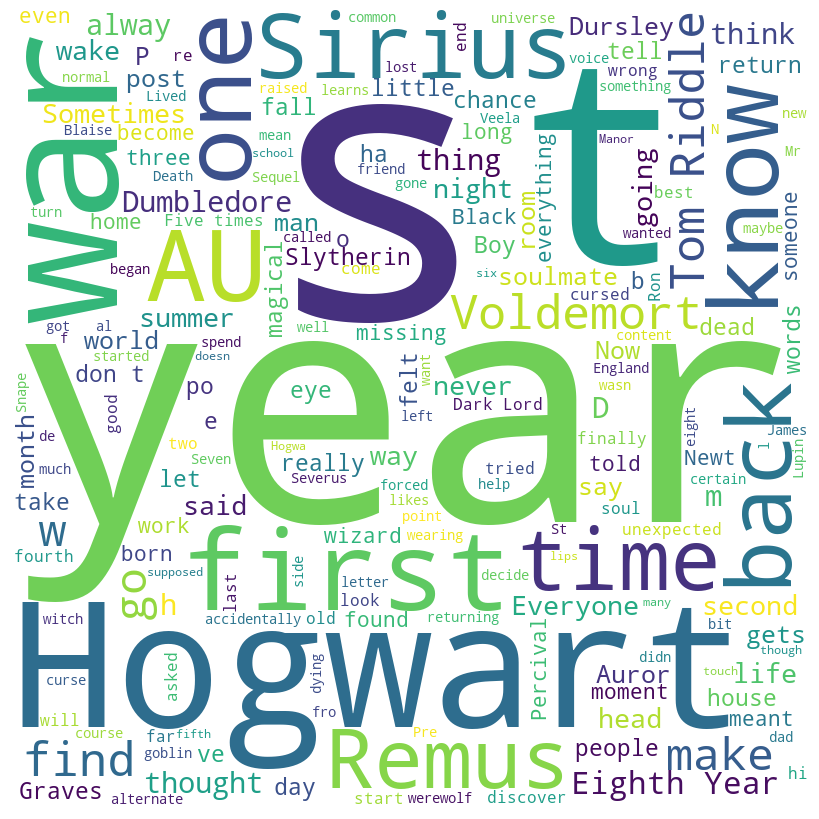

In [42]:
# Word cloud without Harry Potter, Draco Malfoy and Hermione Granger

summary_words = fics['Summary'].to_string()
stop_words = ['Harry Potter', 'Harry', 'Potter', 'Draco Malfoy', 'Draco', 'Malfoy', 'Hermione Granger', 'Hermione', 'Granger'] + list(STOPWORDS)

for val in fics['Summary'].to_string():
    val = str(val)
    tokens = val.split()

for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()

summary_words += ' '.join(tokens) + ' '

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stop_words, min_font_size = 10).generate(summary_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

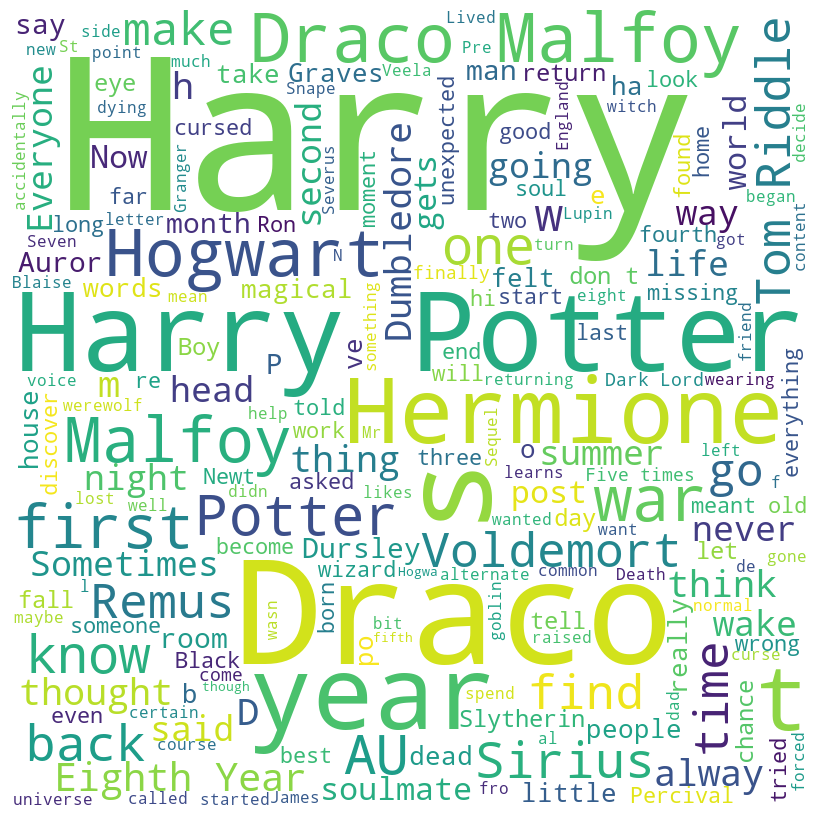

In [43]:
# Word cloud including Harry Potter, Draco Malfoy and Hermione Granger

summary_words = fics['Summary'].to_string()
stopwords = set(STOPWORDS)

for val in fics['Summary'].to_string():
    val = str(val)
    tokens = val.split()

for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()

summary_words += ' '.join(tokens) + ' '

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords, min_font_size = 10).generate(summary_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()